In [ ]:

import pandas as pd
from statsmodels.tsa.stattools import adfuller
import plotly.express as px
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot as plt
import statsmodels.graphics.tsaplots as tsa_plots
from sklearn.metrics import mean_squared_log_error
import pmdarima as pm
import statsmodels.api as sm
from math import sqrt


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/NSE Training Data - 1st Jan 2016 to 1st Jan 2022.csv")

In [ ]:
df["Date"]=pd.to_datetime(df["Date"])

In [ ]:
fig=px.scatter(df,x="Date",y="Close",color="Close")
fig.show()

In [ ]:
fig=px.scatter(df,x="Date",y="High",color="High")
fig.show()

In [ ]:
fig=px.scatter(df,x="Date",y="Low",color="Low")
fig.show()

In [ ]:
df.describe()

In [ ]:
df.isnull().sum()

In [ ]:
df[df["Close"].isnull()]

In [ ]:
loc=np.where(df["Close"].astype("str")=="nan")

for i in list(loc[0]):
    df["Close"][i]=(df["Close"][i-1]+df["Close"][i+1])/2
    df["Open"][i]=(df["Open"][i-1]+df["Open"][i+1])/2   
    df["High"][i]=(df["High"][i-1]+df["High"][i+1])/2
    df["Low"][i]=(df["Low"][i-1]+df["Low"][i+1])/2
    df["Adj Close"][i]=(df["Adj Close"][i-1]+df["Adj Close"][i+1])/2
    df["Volume"][i]=(df["Volume"][i-1]+df["Volume"][i+1])/2

In [ ]:
df.isnull().sum()

In [ ]:
adft_close = adfuller(df["Close"],autolag='AIC')
adft_close

In [ ]:
rmean = df["Close"].rolling(12).mean()
df["rmean"]=rmean
fig=px.scatter(df,x="Date",y="rmean",color="rmean")
fig.show()


In [ ]:
rstd = df["Close"].rolling(12).std()
df["rstd"]=rstd
fig=px.scatter(df,x="Date",y="rstd",color="rstd")
fig.show()

In [ ]:
result = seasonal_decompose(df["Close"], model='multiplicative', period= 12)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

In [ ]:
df["close_log"]=np.log(df["Close"])
df["close_log_diff"]= df["close_log"]-df["close_log"].shift().dropna()

In [ ]:
adft_close_log = adfuller(df["close_log"],autolag='AIC')
adft_close_log

In [ ]:
adft_close_log_diff = adfuller(df["close_log_diff"].dropna(),autolag='AIC')
adft_close_log_diff

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



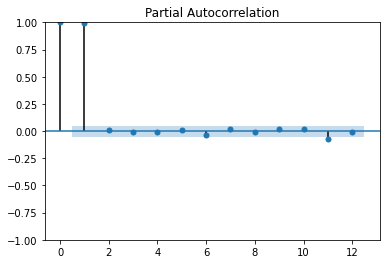

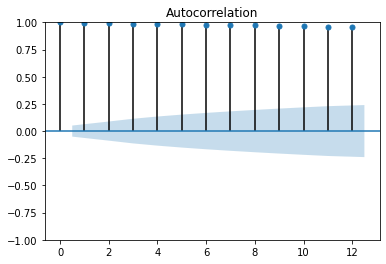

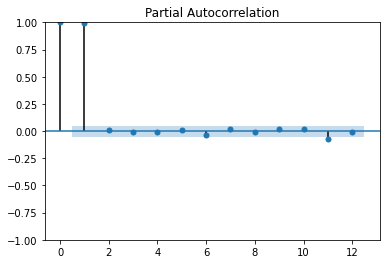

In [ ]:
tsa_plots.plot_acf(df["Close"], lags = 12)
tsa_plots.plot_pacf(df["Close"], lags = 12)

In [ ]:
tsa_plots.plot_acf(df["close_log"],lags = 12)


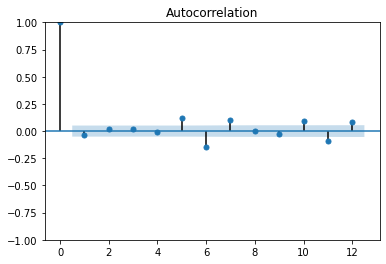

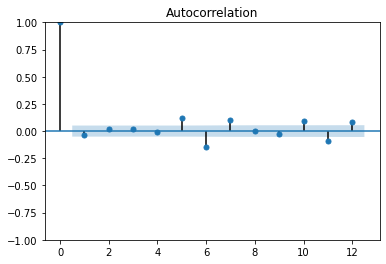

In [ ]:
tsa_plots.plot_acf(df["close_log_diff"].dropna(), lags = 12)


In [ ]:
train=df["Close"].iloc[:1458,]
train

In [ ]:
train_log_diff=df["close_log_diff"].iloc[1:1458,]
train_log_diff

In [ ]:
test=df["Close"].iloc[1458:,]
test

In [ ]:
ar_model = pm.auto_arima(train, start_p=0, start_q=0,max_p=12, max_q=12, m=1,d=None,seasonal=False,start_P=0, trace=True,error_action='warn', stepwise=True)


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=18049.297, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=18051.238, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=18051.246, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=18051.432, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=18052.435, Time=0.69 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.926 seconds


In [ ]:
model=sm.tsa.statespace.SARIMAX(train,order=(0,1,0),seasonal_order=(0,1,0,12))


In [ ]:
results=model.fit()

In [ ]:
df['forecast']=results.predict(start=1458,end=1482,dynamic=True)


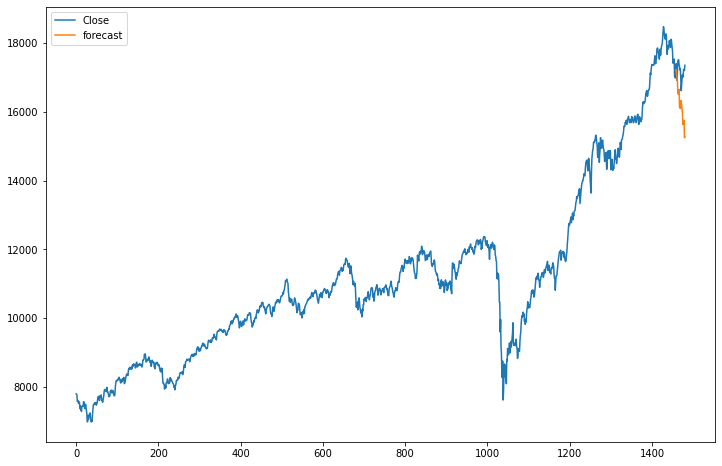

In [ ]:
df[['Close','forecast']].plot(figsize=(12,8))

In [ ]:
df

In [ ]:
test_accuracy= sqrt(mean_squared_log_error(test, df["forecast"].iloc[1458:,]))
test_accuracy

0.06511699663345828

In [ ]:
final_model=sm.tsa.statespace.SARIMAX(df["Close"],order=(0, 1, 0),seasonal_order=(0,1,0,12))


In [ ]:
final_result=model.fit()

In [ ]:
pred=final_result.predict(start=1481,end=1503).reset_index(drop=True)
pred

0     15202.398439
1     15431.548830
2     15438.248049
3     15327.998049
4     15227.449221
5     15093.599611
6     14745.349611
7     14832.148439
8     14743.849611
9     14865.048830
10    14355.248049
11    14382.748049
12    14311.998049
13    14541.148440
14    14547.847659
15    14437.597659
16    14337.048831
17    14203.199221
18    13854.949221
19    13941.748049
20    13853.449221
21    13974.648440
22    13464.847659
Name: predicted_mean, dtype: float64

In [ ]:
forecasting=pd.read_csv("/content/drive/MyDrive/NSE Out of Time Testing Data - 1st Jan 2022 to 4th Feb 2022.csv")

In [ ]:
forecasting['pred']=pred


In [ ]:
forecasting

,Date,Open,High,Low,Close,Adj Close,Volume,pred
0,2022-01-03,17387.150391,17646.650391,17383.300781,17625.699219,17625.699219,200500,16970.610130
1,2022-01-04,17681.400391,17827.599609,17593.550781,17805.250000,17805.250000,247400,16960.317843
2,2022-01-05,17820.099609,17944.699219,17748.849609,17925.250000,17925.250000,251500,16955.056170
3,2022-01-06,17768.500000,17797.949219,17655.550781,17745.900391,17745.900391,236500,16952.308662
4,2022-01-07,17797.599609,17905.000000,17704.550781,17812.699219,17812.699219,239300,16934.642343
5,2022-01-10,17913.300781,18017.449219,17879.150391,18003.300781,18003.300781,232400,16951.087838
6,2022-01-11,17997.750000,18081.250000,17964.400391,18055.750000,18055.750000,220200,16937.567856
7,2022-01-12,18170.400391,18227.949219,18128.800781,18212.349609,18212.349609,245000,16929.292459
8,2022-01-13,18257.000000,18272.250000,18163.800781,18257.800781,18257.800781,303700,16934.402663
9,2022-01-14,18185.000000,18286.949219,18119.650391,18255.750000,18255.750000,229500,16932.969077


In [ ]:
final_accuracy=sqrt(mean_squared_log_error(forecasting["Close"], forecasting["pred"]))
final_accuracy

0.05048201418003353